In [10]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
from run_simulation import run_multiple_simulation

In [11]:
def plot_line(results, MC_position, fig, axs):
    MC_positions = [1, 50, 100]
    for i in range(2):
        axs[i,0].set_ylabel('Distance')
        for j in range(2): 
        # Calculate the mean results for the current index
            mean_results = np.mean(results[:, i, MC_position, :], axis=0)
            axs[i,j].plot(mean_results, label=fr'MC length = {MC_positions[MC_position]}')

            axs[i,j].set_title(f'Simulation {i+1}') 
            axs[1,j].set_xlabel('Iterations')
            axs[i,j].grid(True)
            axs[i,j].legend()

    axs[0,0].set_title('Linear Cooling Schedule') 
    axs[0,1].set_title('Geometric Cooling Schedule') 
    axs[1,0].set_title('Hybird Cooling Schedule') 
    axs[1,1].set_title('Inverse Cooling Schedule') 

    plt.tight_layout()

def Welch_test(results_1,results_2): 
    mean_1 = np.mean(results_1)
    mean_2 = np.mean(results_2)
    print(fr'compare {mean_1} and {mean_2}')
    var_1 = np.var(results_1, ddof=1)
    var_2 = np.var(results_2, ddof=1)
    t_stats = (mean_1-mean_2)/np.sqrt((var_1+var_2)/50)
    dof = (var_1+var_2)**2 / (var_1**2+var_2**2) * 49
    pvalues = 2 * (1 - t.cdf(np.abs(t_stats), dof))

    return pvalues 

def p_value(results_1, results_2, results_3, results_4, results_5): 
    data = np.zeros((5,5))
    results = np.zeros((50,5))

    results[:,0] = results_1
    results[:,1] = results_2
    results[:,2] = results_3
    results[:,3] = results_4
    results[:,4] = results_5

    for i in range(5): 
        for j in range(5): 
            data[i,j] = Welch_test(results[:,i], results[:,j])

    plt.figure(figsize=(8, 6))
    x_labels = ['Linear', 'Geometric', 'Hybird', 'Inverse', 'Local']

    sns.heatmap(data, annot=True, fmt=".2f", cmap='viridis', cbar=True,
                xticklabels=x_labels, yticklabels=x_labels)

    plt.title('$p$-value')
    plt.show()   

def plot_box(data): 
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=data, color='skyblue')
    print(max(data))  

    plt.title('Box Plot of local search algorithm')  
    plt.ylabel('Values')            
    plt.grid(axis='y')              

    plt.show()

In [12]:
dim = 280
num_i = 1000000
num_run = 50
results_hc, route = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='HC', load_file=True)
max_diff_dist = np.max((results_hc[:, :-1] - results_hc[:, 1:]).mean(axis=0))
initial_temps = [max_diff_dist/2, max_diff_dist, max_diff_dist*2]
print(f'initial temperatures are {initial_temps}')
results_sa_t0, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[0], load_file=True)
results_sa_t1, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[1], load_file=True)
results_sa_t2, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[2], load_file=True)


Running Algorithm HC...
Successfully loaded data!
initial temperatures are [np.float64(28.244310986884447), np.float64(56.48862197376889), np.float64(112.97724394753779)]
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!


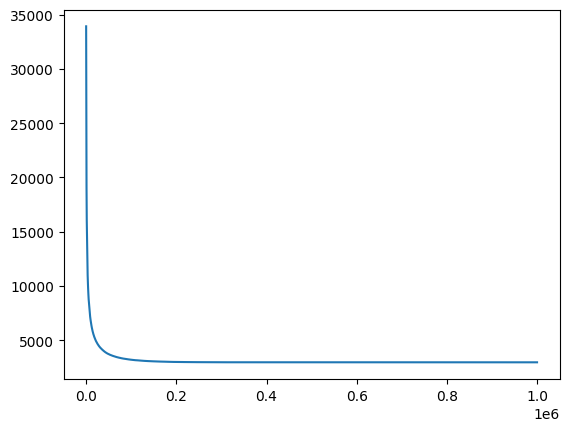

In [13]:
plt.plot(np.mean(results_hc, axis=0))

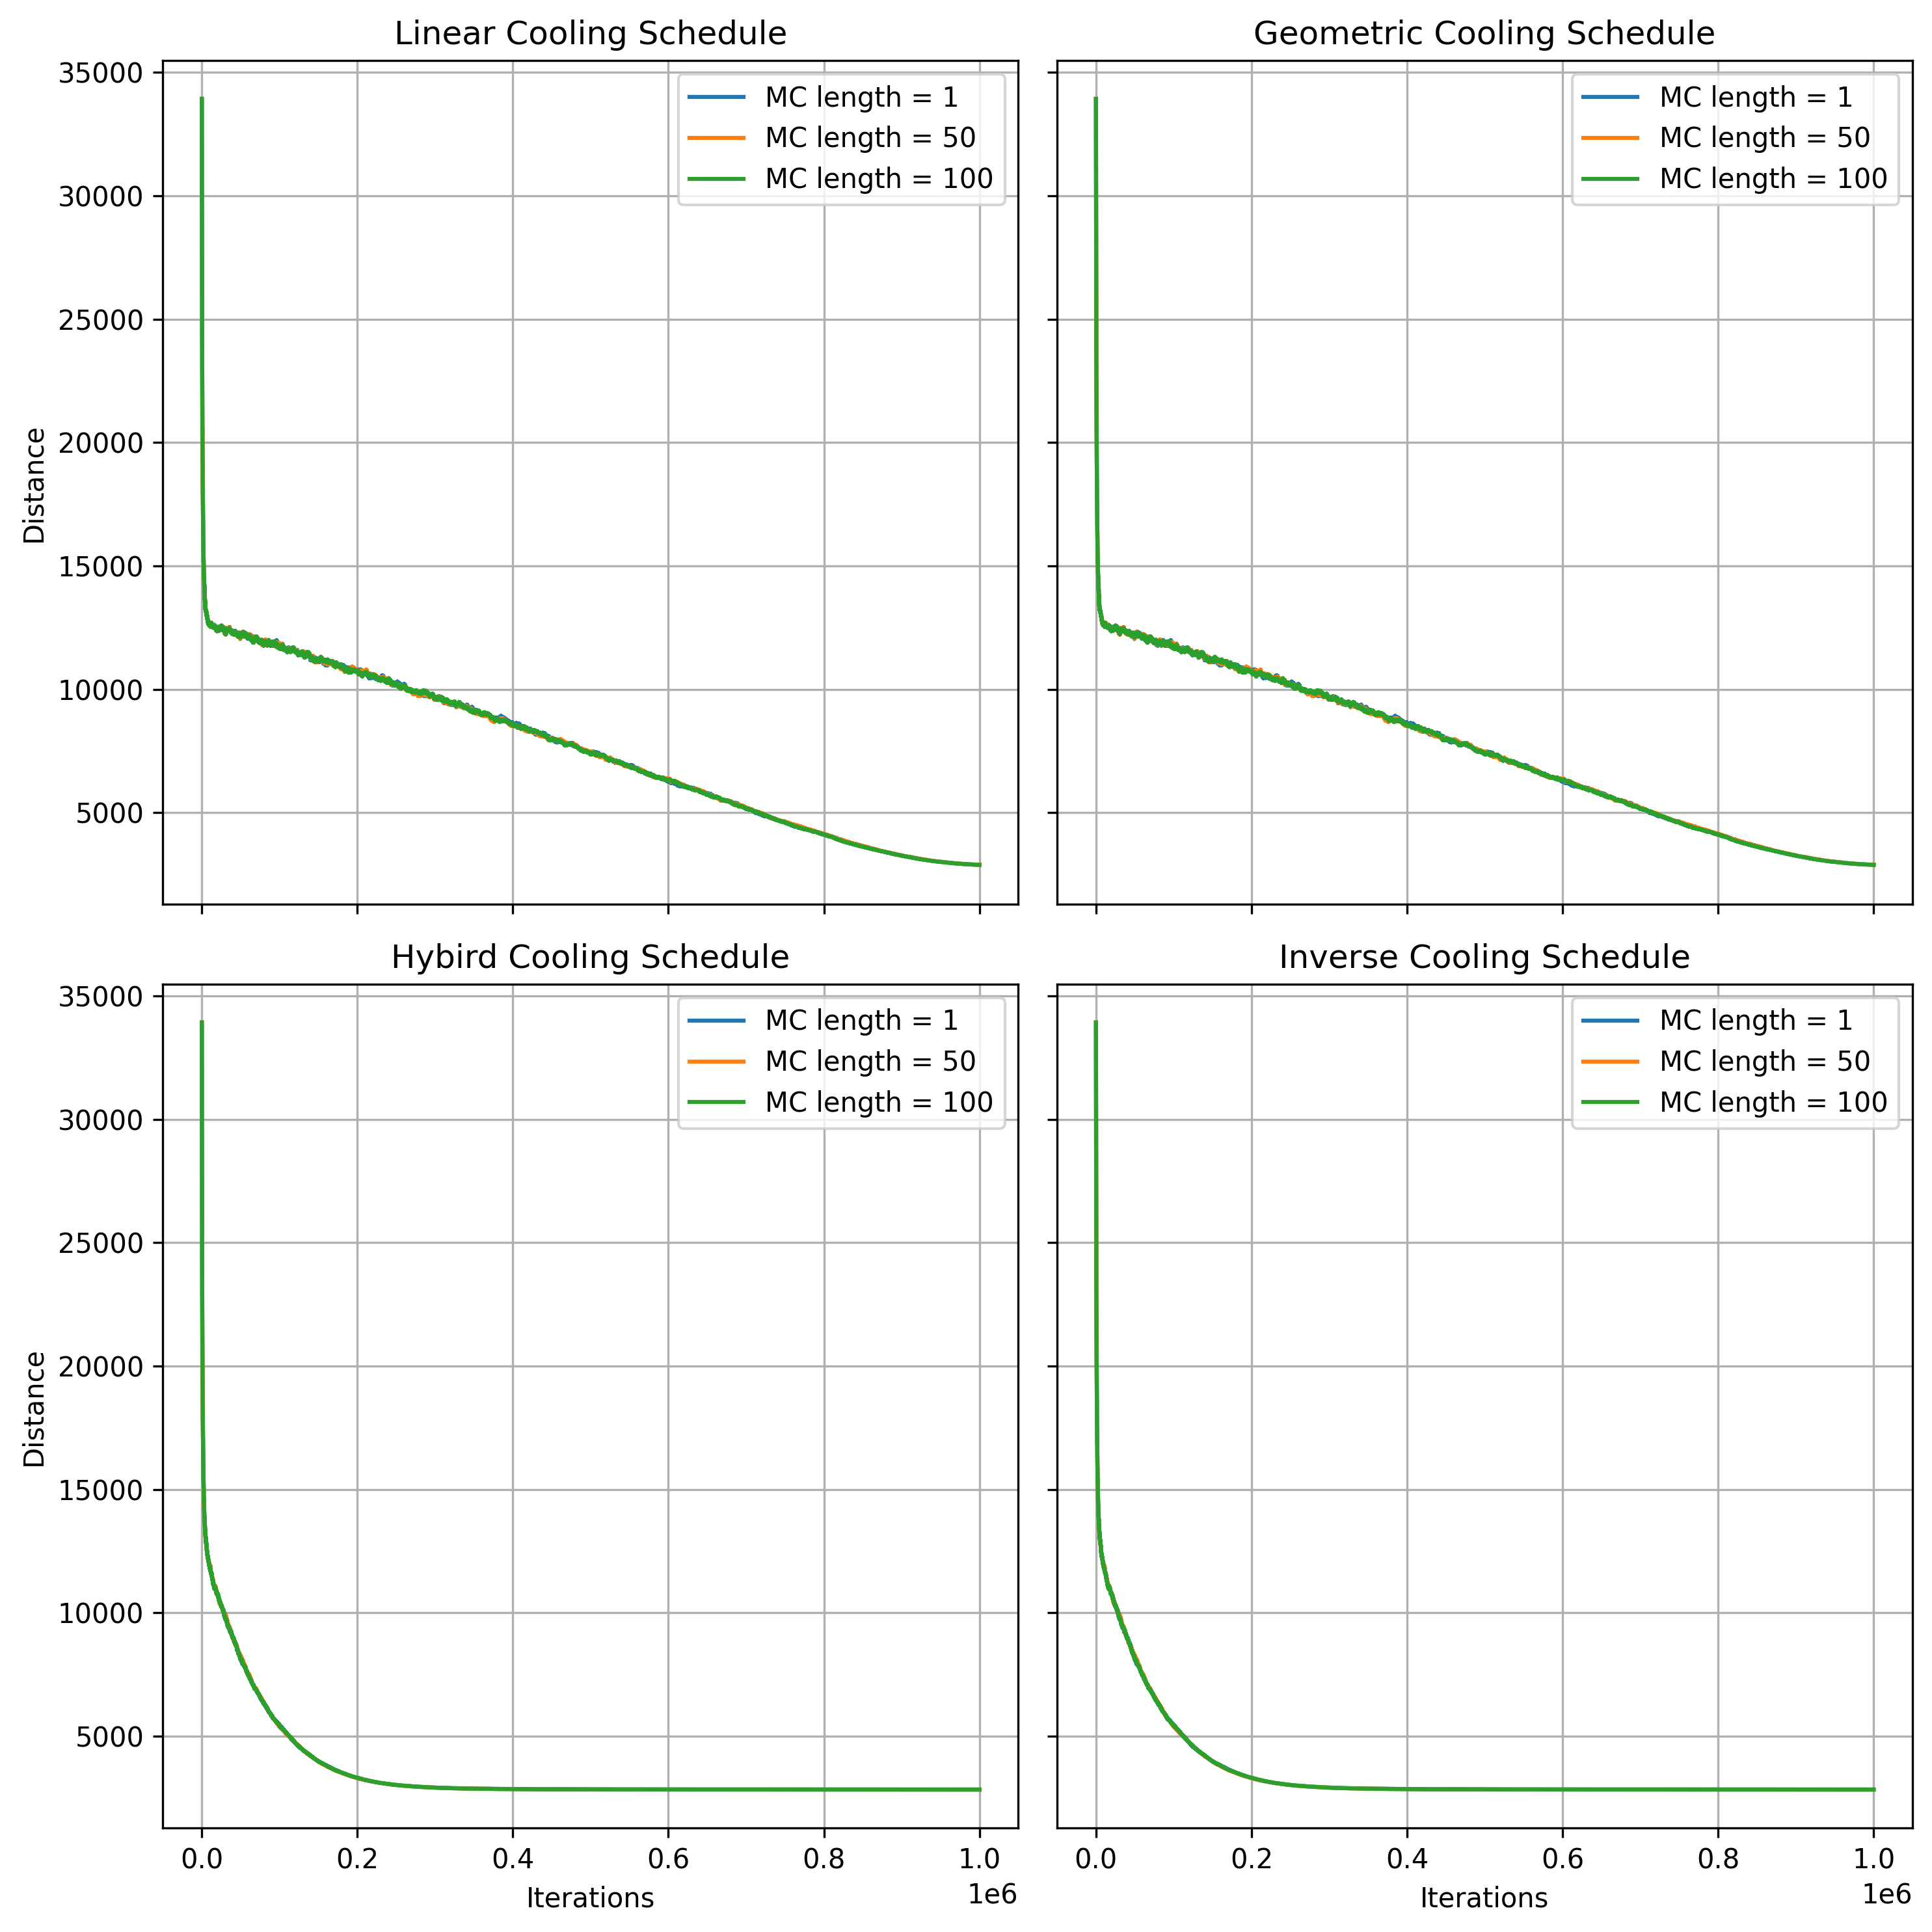

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), dpi=300, sharex=True, sharey=True)

plot_line(results_sa_t0, 0, fig, axs)
plot_line(results_sa_t0, 1, fig, axs)
plot_line(results_sa_t0, 2, fig, axs)

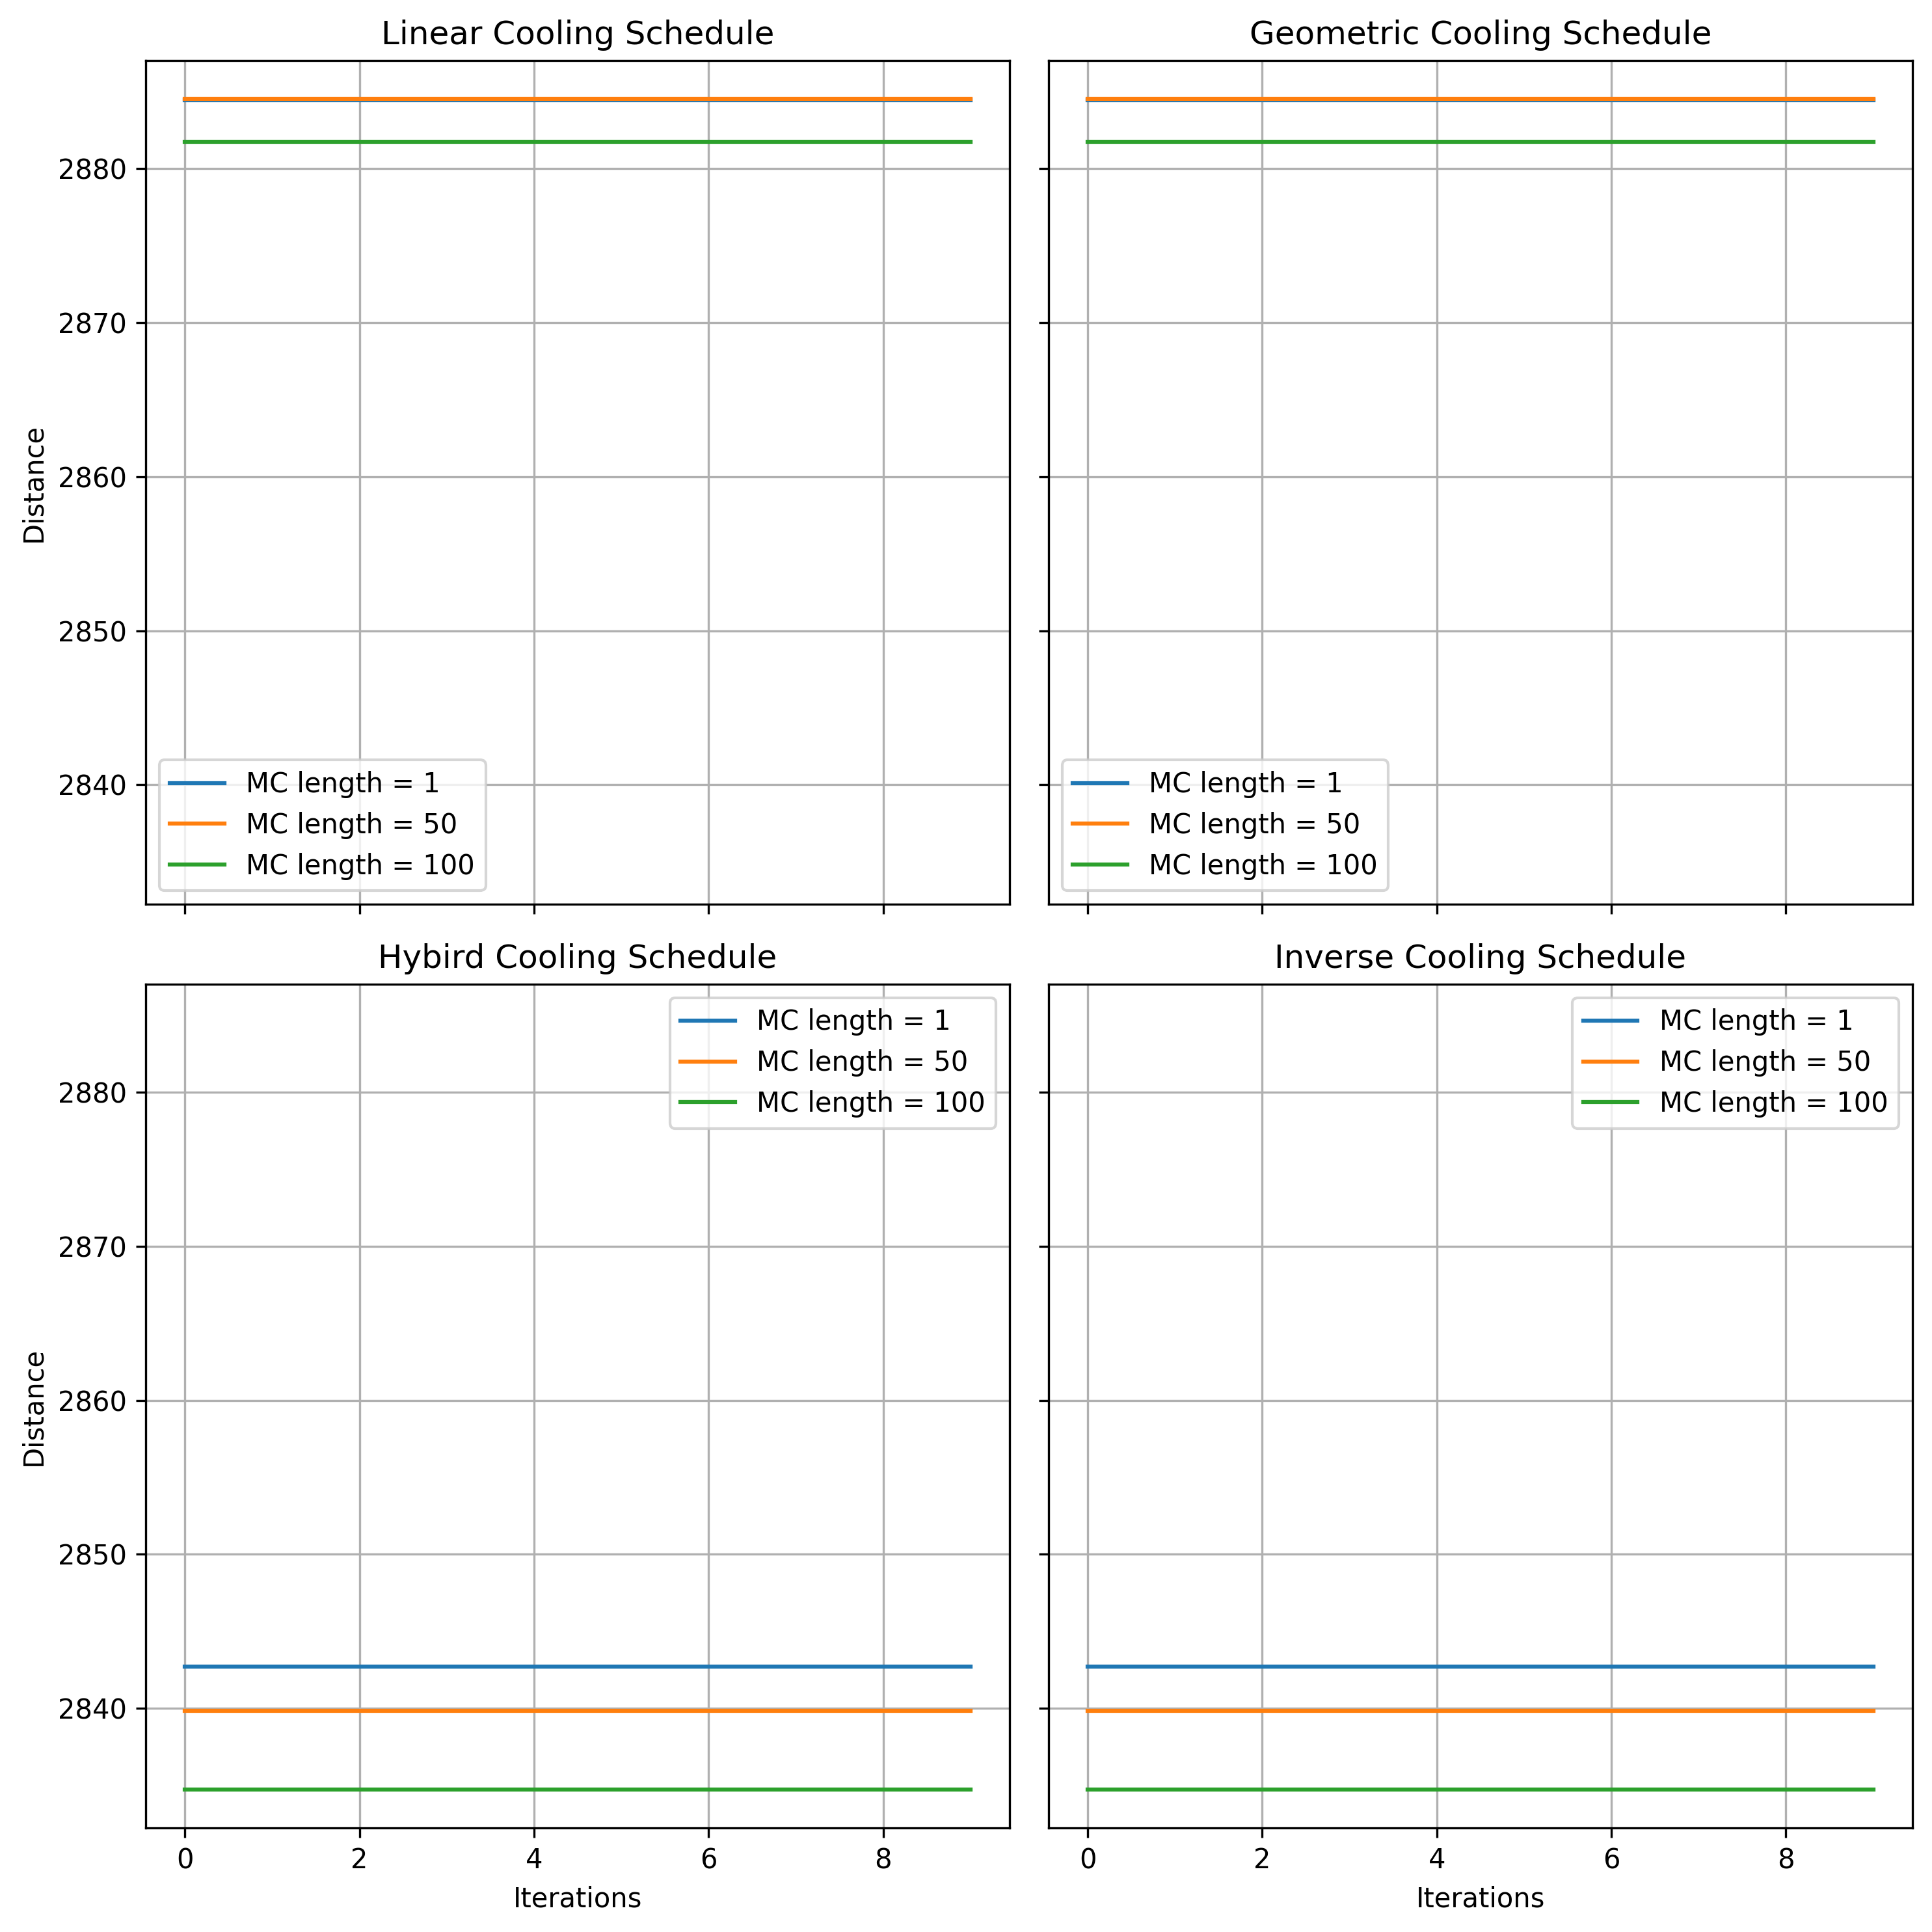

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), dpi=300, sharex=True, sharey=True)

plot_line(results_sa_t0[:,:,:,999990:1000000], 0, fig, axs)
plot_line(results_sa_t0[:,:,:,999990:1000000], 1, fig, axs)
plot_line(results_sa_t0[:,:,:,999990:1000000], 2, fig, axs)

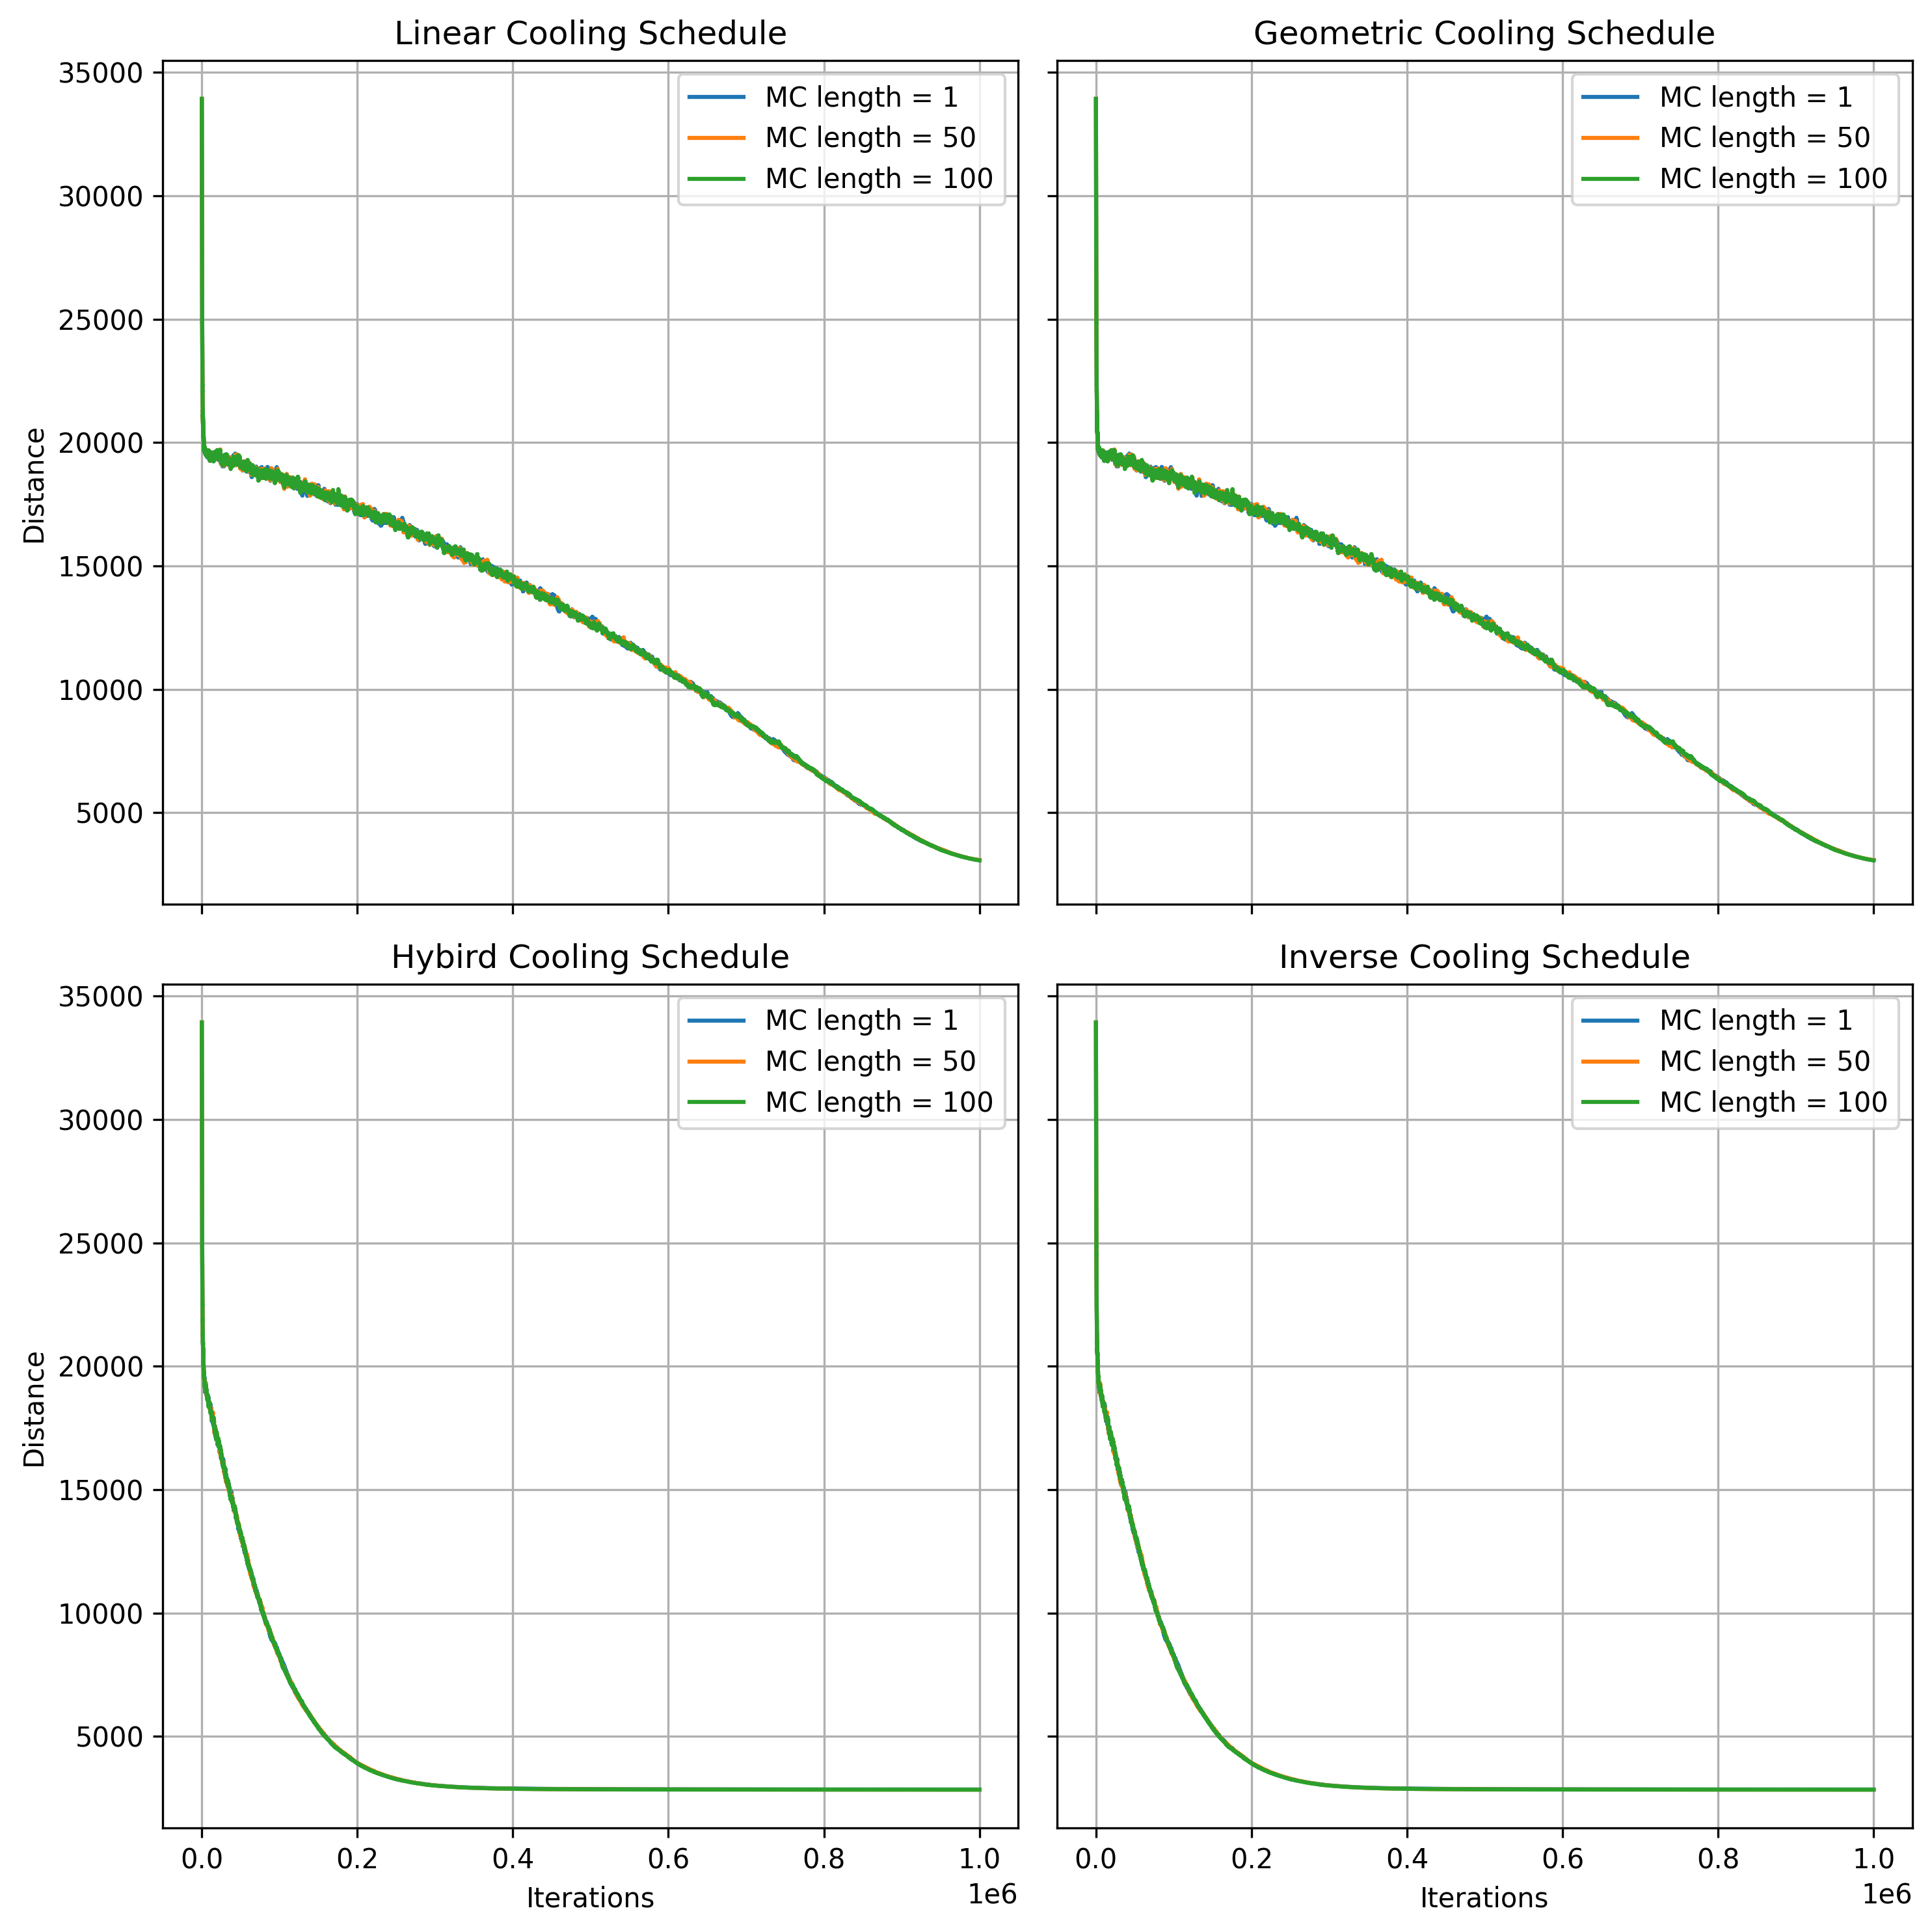

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), dpi=300, sharex=True, sharey=True)

plot_line(results_sa_t1, 0, fig, axs)
plot_line(results_sa_t1, 1, fig, axs)
plot_line(results_sa_t1, 2, fig, axs)

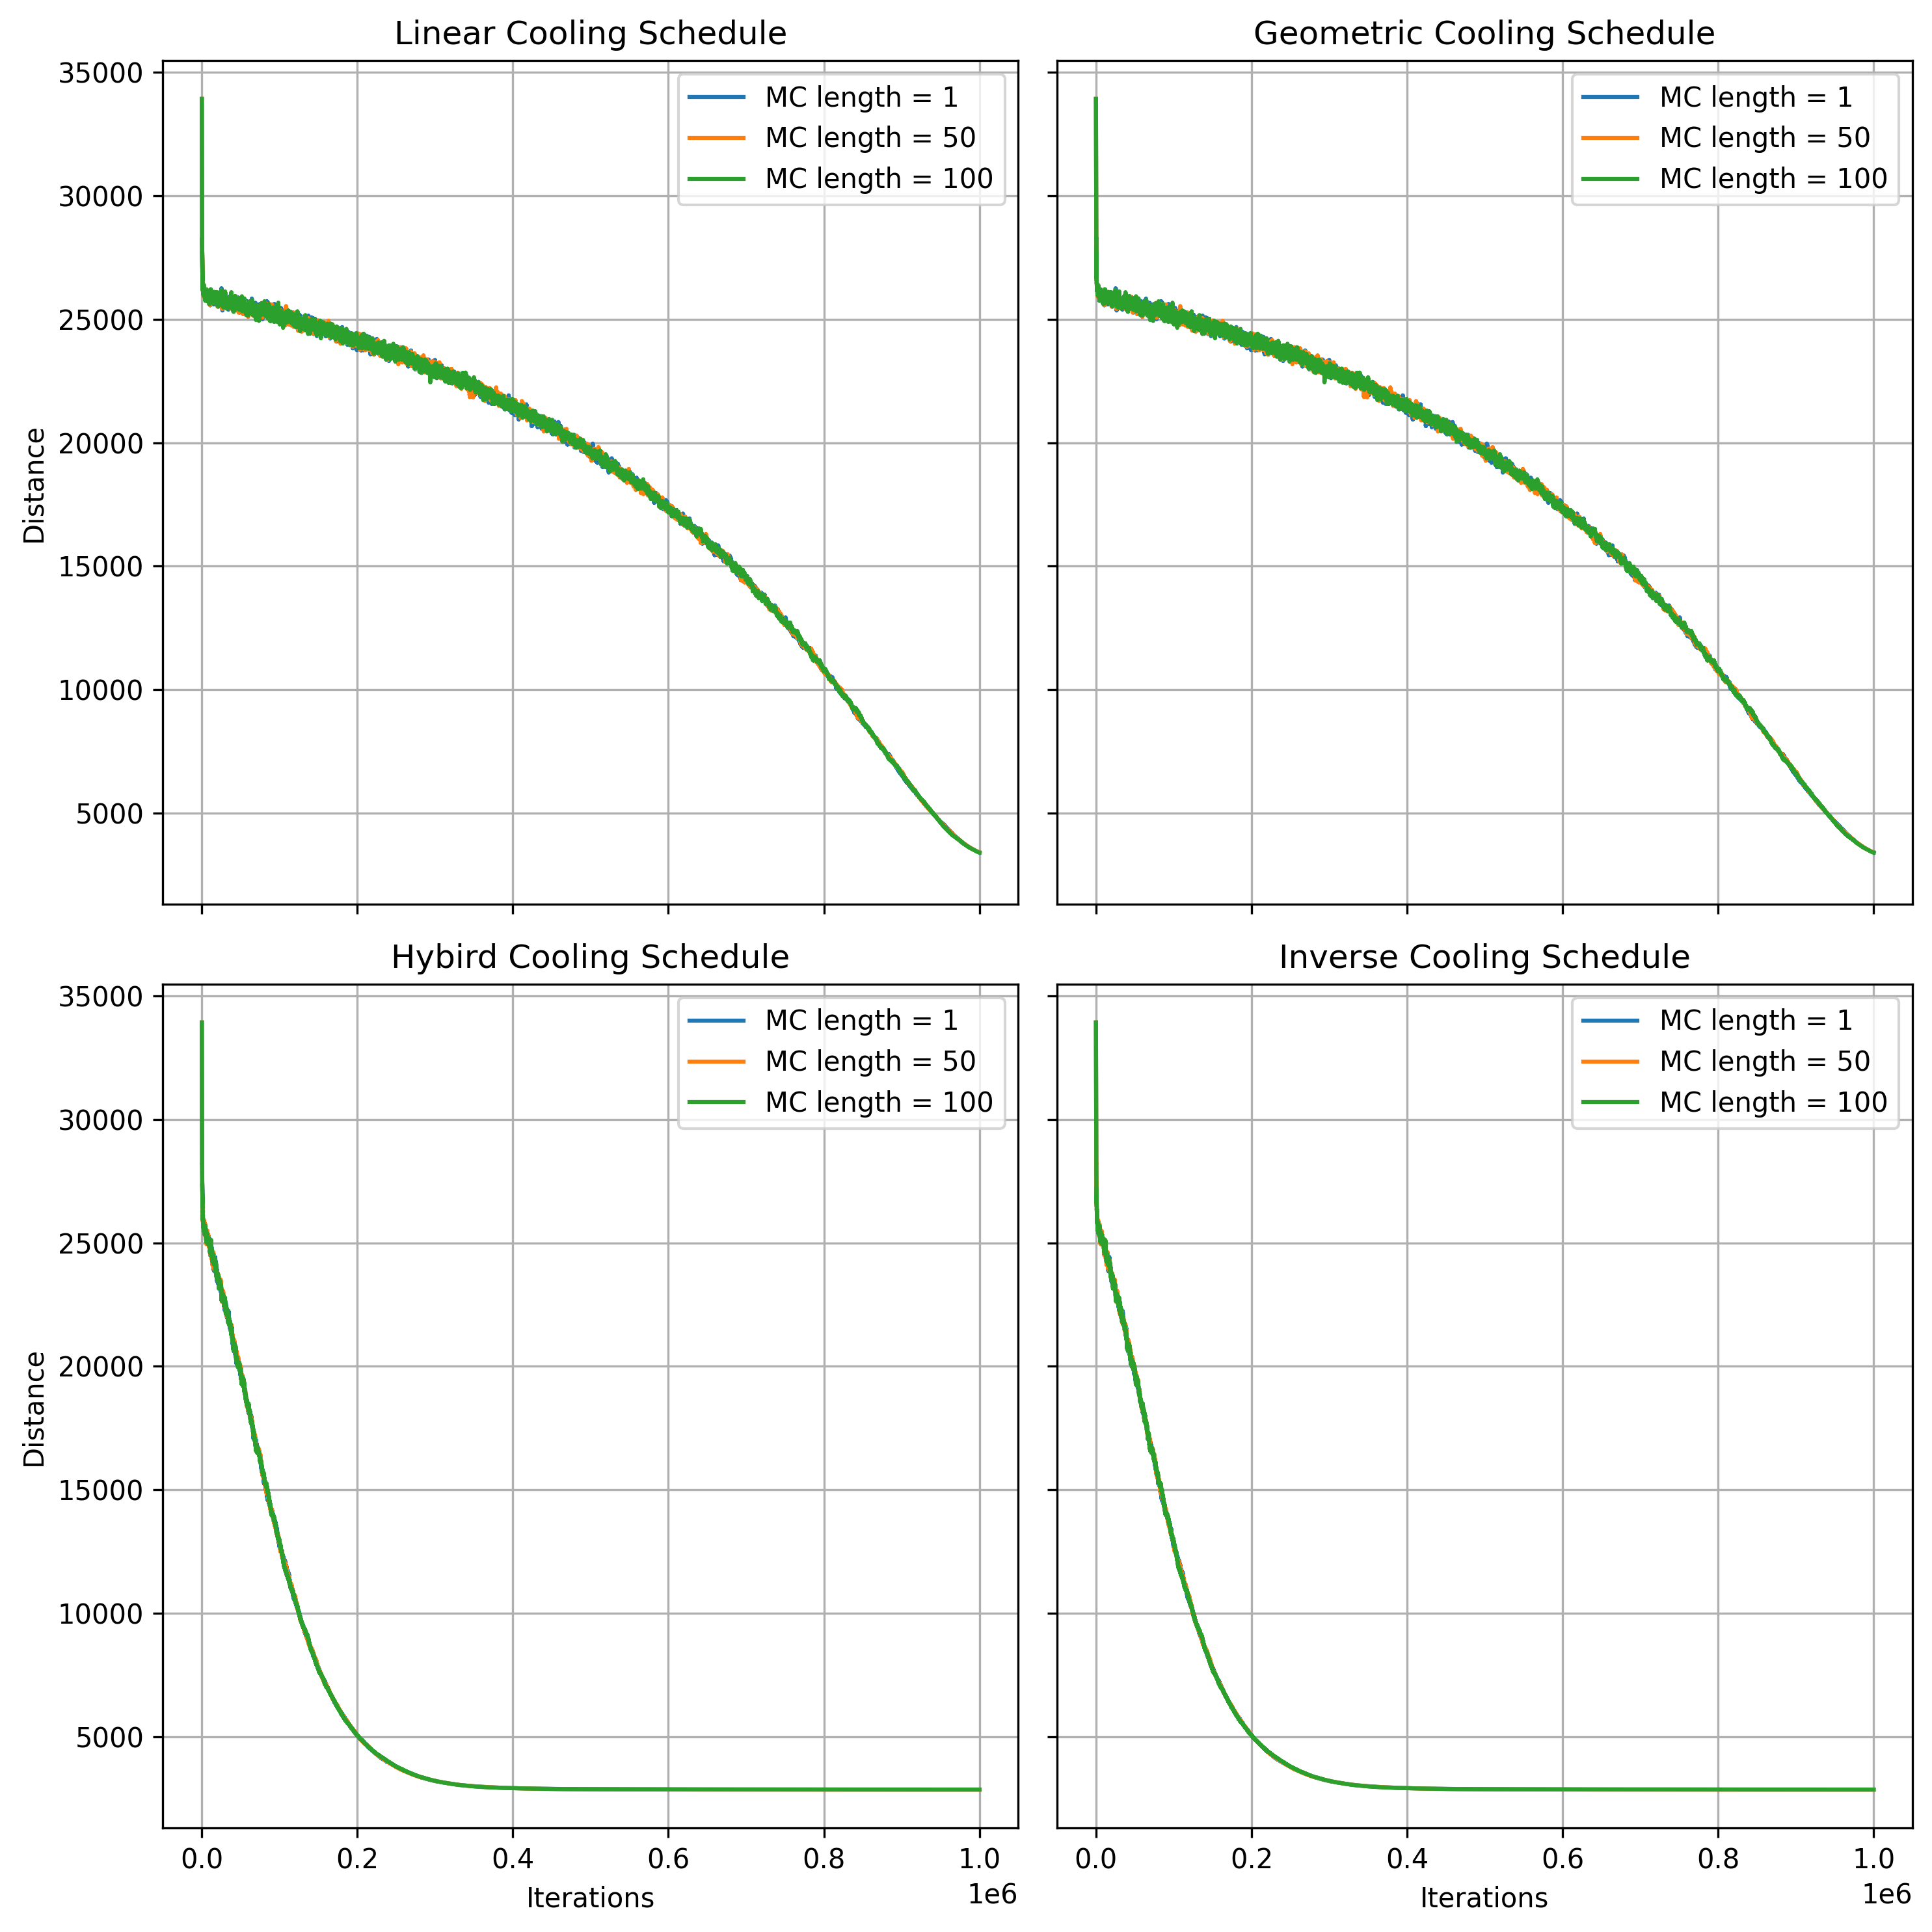

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), dpi=300, sharex=True, sharey=True)

plot_line(results_sa_t2, 0, fig, axs)
plot_line(results_sa_t2, 1, fig, axs)
plot_line(results_sa_t2, 2, fig, axs)

compare 2884.448882488552 and 2884.448882488552
compare 2884.448882488552 and 2842.706092337502
compare 2884.448882488552 and 2780.770480821497
compare 2884.448882488552 and 2918.9727796469074
compare 2884.448882488552 and 2980.333184726935
compare 2842.706092337502 and 2884.448882488552
compare 2842.706092337502 and 2842.706092337502
compare 2842.706092337502 and 2780.770480821497
compare 2842.706092337502 and 2918.9727796469074
compare 2842.706092337502 and 2980.333184726935
compare 2780.770480821497 and 2884.448882488552
compare 2780.770480821497 and 2842.706092337502
compare 2780.770480821497 and 2780.770480821497
compare 2780.770480821497 and 2918.9727796469074
compare 2780.770480821497 and 2980.333184726935
compare 2918.9727796469074 and 2884.448882488552
compare 2918.9727796469074 and 2842.706092337502
compare 2918.9727796469074 and 2780.770480821497
compare 2918.9727796469074 and 2918.9727796469074
compare 2918.9727796469074 and 2980.333184726935
compare 2980.333184726935 and 2

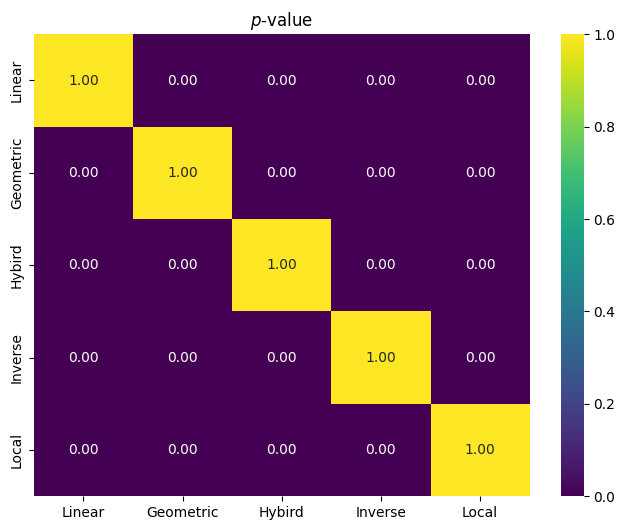

In [18]:
p_value(results_sa_t0[:,0,0,-1],results_sa_t0[:,1,0,-1],results_sa_t0[:,2,0,-1],results_sa_t0[:,3,0,-1],results_hc[:,-1])

In [19]:
dim = 442
num_i = 1000000
num_run = 50
results_hc_442, route = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='HC', load_file=True)
max_diff_dist = np.max((results_hc_442[:, :-1] - results_hc_442[:, 1:]).mean(axis=0))
initial_temps = [max_diff_dist/2, max_diff_dist, max_diff_dist*2]
print(f'initial temperatures are {initial_temps}')
results_sa_t0_442, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[0], load_file=True)
results_sa_t1_442, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[1], load_file=True)
results_sa_t2_442, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[2], load_file=True)


Running Algorithm HC...
Successfully loaded data!
initial temperatures are [np.float64(413.05991291653135), np.float64(826.1198258330627), np.float64(1652.2396516661254)]
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!


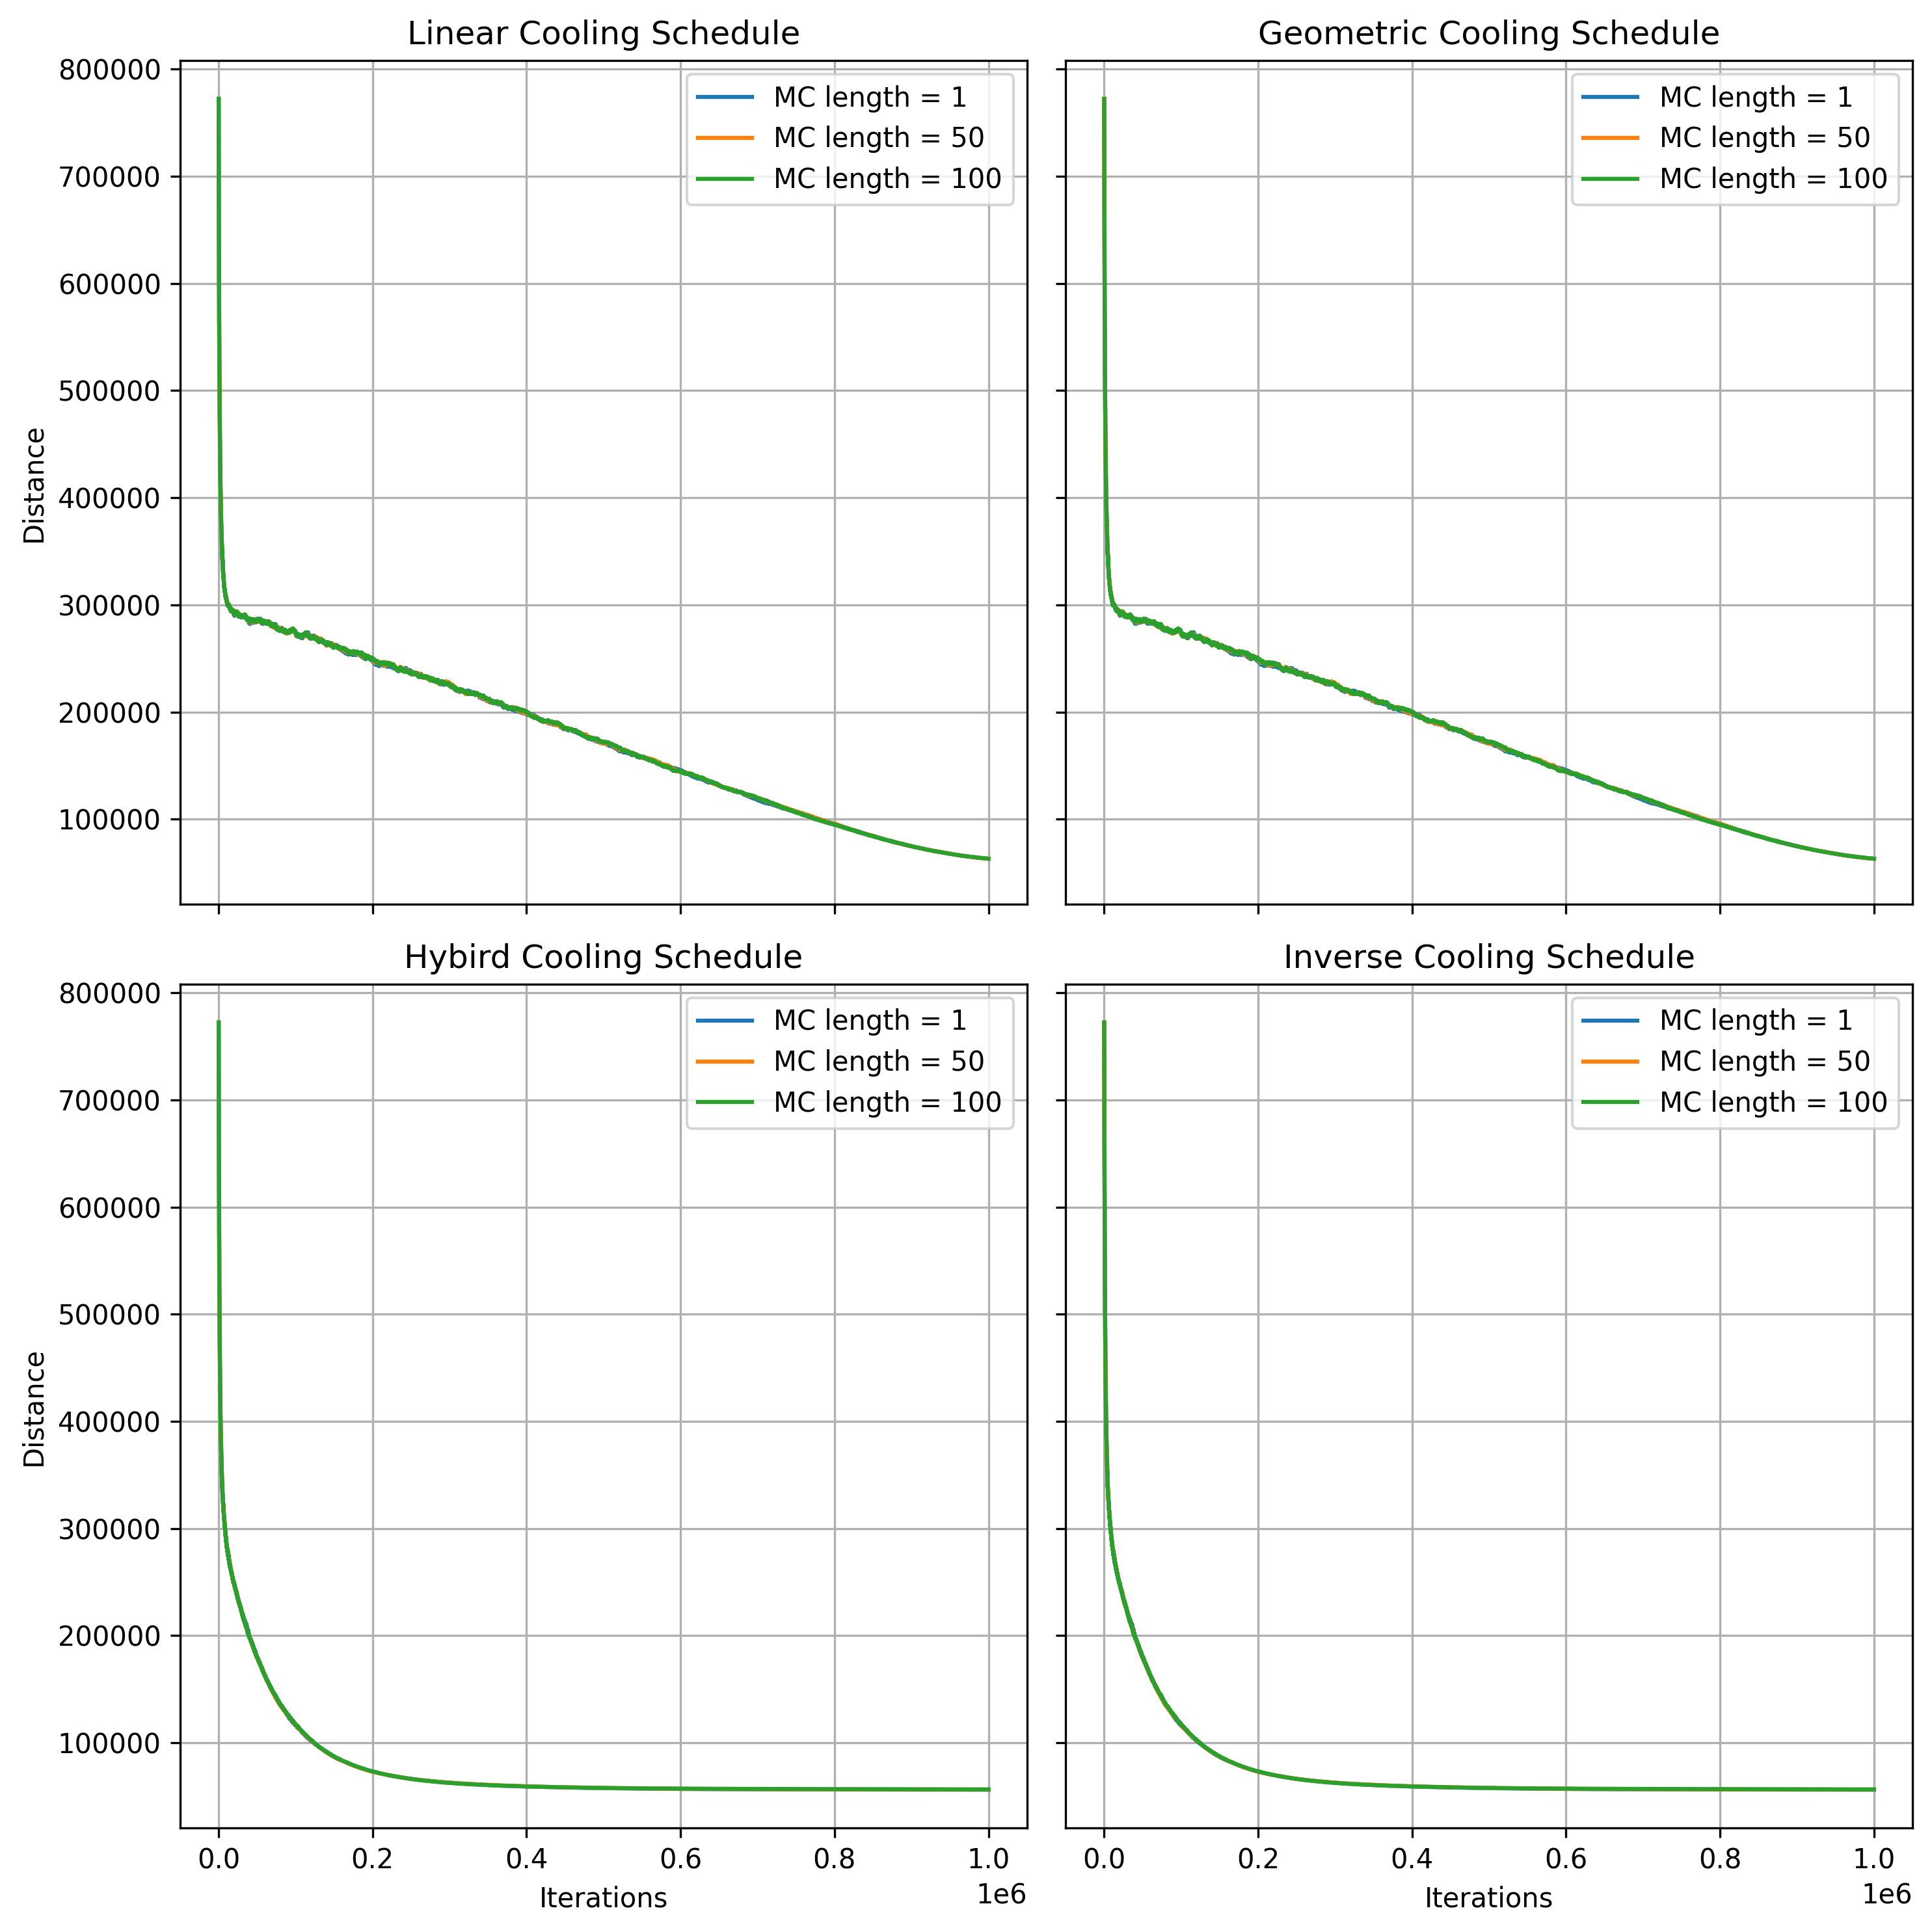

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=300, sharex=True, sharey=True)

plot_line(results_sa_t0_442, 0, fig, axs)
plot_line(results_sa_t0_442, 1, fig, axs)
plot_line(results_sa_t0_442, 2, fig, axs)

compare 63055.65294838659 and 63055.65294838659
compare 63055.65294838659 and 56223.50341403154
compare 63055.65294838659 and 58021.56427855059
compare 63055.65294838659 and 57026.53445106118
compare 63055.65294838659 and 57809.64603991358
compare 56223.50341403154 and 63055.65294838659
compare 56223.50341403154 and 56223.50341403154
compare 56223.50341403154 and 58021.56427855059
compare 56223.50341403154 and 57026.53445106118
compare 56223.50341403154 and 57809.64603991358
compare 58021.56427855059 and 63055.65294838659
compare 58021.56427855059 and 56223.50341403154
compare 58021.56427855059 and 58021.56427855059
compare 58021.56427855059 and 57026.53445106118
compare 58021.56427855059 and 57809.64603991358
compare 57026.53445106118 and 63055.65294838659
compare 57026.53445106118 and 56223.50341403154
compare 57026.53445106118 and 58021.56427855059
compare 57026.53445106118 and 57026.53445106118
compare 57026.53445106118 and 57809.64603991358
compare 57809.64603991358 and 63055.6529

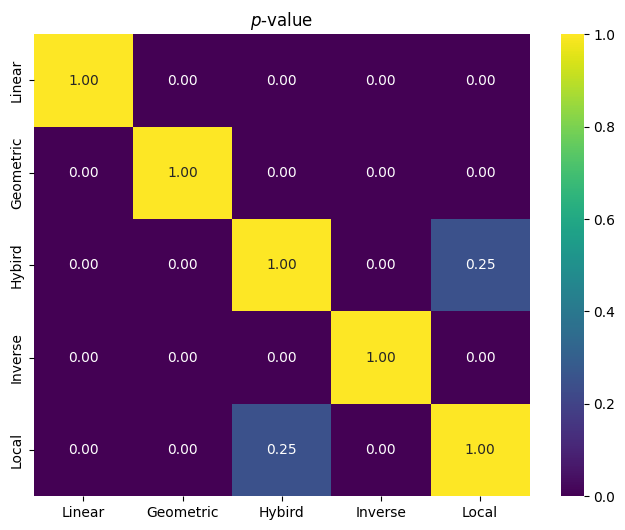

In [8]:
p_value(results_sa_t0_442[:,0,0,-1],results_sa_t0_442[:,1,0,-1],results_sa_t0_442[:,2,0,-1],results_sa_t0_442[:,3,0,-1],results_hc_442[:,-1])

56.48862197376889


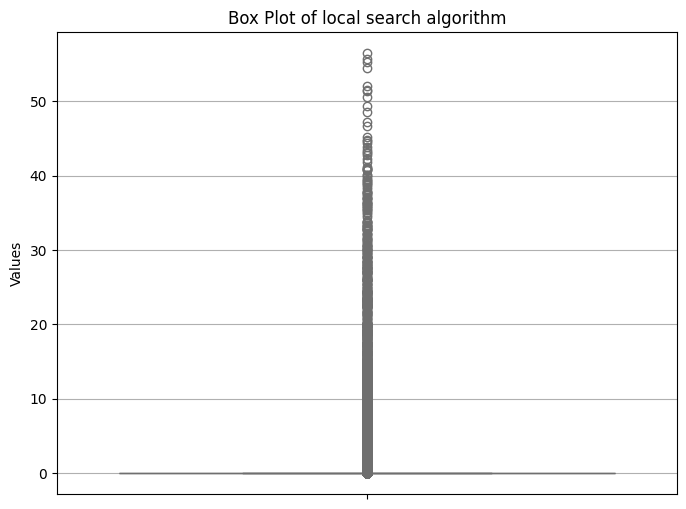

In [12]:
plot_box(box_result_280)

826.1198258330627


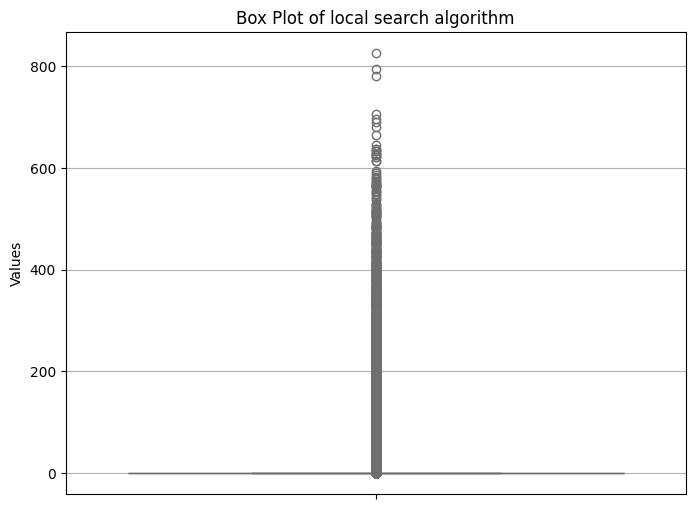

In [15]:
plot_box(box_result_442)

In [ ]:
mean=np.mean(results_sa_280[:,0,0,:], axis=0)

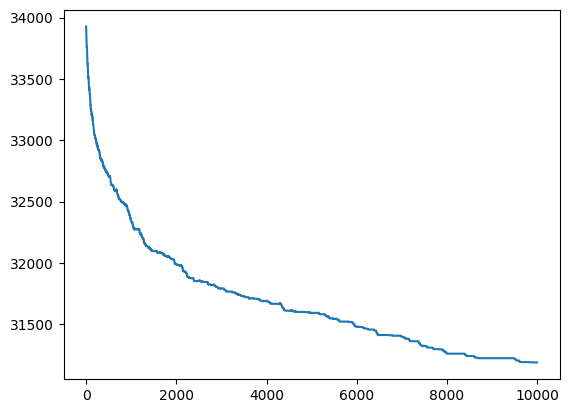

In [ ]:

plt.plot(mean)